In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv("global_air_pollution_data.csv")
df.head()

,country_name,city_name,aqi_value,aqi_category,co_aqi_value\t,co_aqi_category,ozone_aqi_value,ozone_aqi_category,no2_aqi_value,no2_aqi_category,pm2.5_aqi_value,pm2.5_aqi_category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   country_name        23036 non-null  object
 1   city_name           23462 non-null  object
 2   aqi_value           23463 non-null  int64 
 3   aqi_category        23463 non-null  object
 4   co_aqi_value	       23463 non-null  int64 
 5   co_aqi_category     23463 non-null  object
 6   ozone_aqi_value     23463 non-null  int64 
 7   ozone_aqi_category  23463 non-null  object
 8   no2_aqi_value       23463 non-null  int64 
 9   no2_aqi_category    23463 non-null  object
 10  pm2.5_aqi_value     23463 non-null  int64 
 11  pm2.5_aqi_category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB


In [ ]:
df.isnull().sum()

country_name          427
city_name               1
aqi_value               0
aqi_category            0
co_aqi_value\t          0
co_aqi_category         0
ozone_aqi_value         0
ozone_aqi_category      0
no2_aqi_value           0
no2_aqi_category        0
pm2.5_aqi_value         0
pm2.5_aqi_category      0
dtype: int64

# EDA

In [ ]:
df['aqi_category'].unique()

array(['Moderate', 'Good', 'Unhealthy for Sensitive Groups', 'Unhealthy',
       'Very Unhealthy', 'Hazardous'], dtype=object)

In [ ]:
df['aqi_category'].value_counts()

aqi_category
Good                              9936
Moderate                          9231
Unhealthy                         2227
Unhealthy for Sensitive Groups    1591
Very Unhealthy                     287
Hazardous                          191
Name: count, dtype: int64

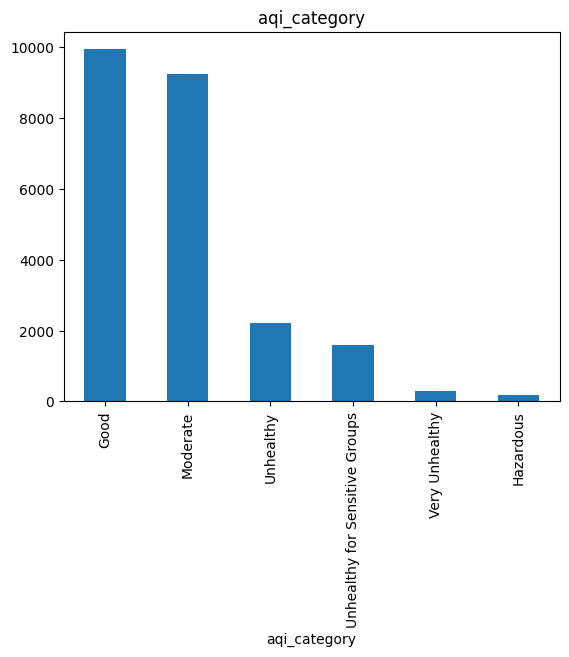

In [ ]:
df['aqi_category'].value_counts().plot.bar()
plt.title('aqi_category')
plt.show()

Kualitas Udara Tidak Sehat: Ketika AQI melebihi 100, kualitas udara menjadi tidak sehat dan risiko terhadap kesehatan meningkat.

Kualitas Udara Baik: Nilai AQI 50 atau lebih rendah menunjukkan kualitas udara yang baik.

Kualitas Udara Baik: Nilai AQI 50 atau lebih rendah menunjukkan kualitas udara yang baik.

Sebagian besar kota memiliki kualitas udara yang baik (9688 kota)

9087 kota kualitas udaranya sedang

2215 kota memiliki kualitas udara yang tidak sehat

Kualitas udara 286 kota Sangat Tidak Sehat dan 191 Berbahaya

In [ ]:
maxm=df[df['aqi_value']==df['aqi_value'].max()]
maxm

,country_name,city_name,aqi_value,aqi_category,co_aqi_value\t,co_aqi_category,ozone_aqi_value,ozone_aqi_category,no2_aqi_value,no2_aqi_category,pm2.5_aqi_value,pm2.5_aqi_category
276,Pakistan,Bahawalnagar,500,Hazardous,1,Good,38,Good,1,Good,466,Hazardous
470,India,Rania,500,Hazardous,1,Good,40,Good,0,Good,464,Hazardous
524,India,Gohana,500,Hazardous,1,Good,47,Good,1,Good,500,Hazardous
611,India,Gunnaur,500,Hazardous,1,Good,73,Moderate,1,Good,500,Hazardous
620,Pakistan,Harunabad,500,Hazardous,1,Good,43,Good,0,Good,443,Hazardous
...,...,...,...,...,...,...,...,...,...,...,...,...
22110,India,Surajgarh,500,Hazardous,1,Good,40,Good,0,Good,464,Hazardous
22259,Russian Federation,Tynda,500,Hazardous,21,Good,8,Good,17,Good,475,Hazardous
22577,India,Bahjoi,500,Hazardous,1,Good,53,Moderate,1,Good,447,Hazardous
22824,India,Bilari,500,Hazardous,4,Good,158,Unhealthy,4,Good,457,Hazardous


In [ ]:
maxm['country_name'].value_counts()

country_name
India                       95
Pakistan                     5
United States of America     1
South Africa                 1
Russian Federation           1
Name: count, dtype: int64

<Axes: xlabel='country_name'>

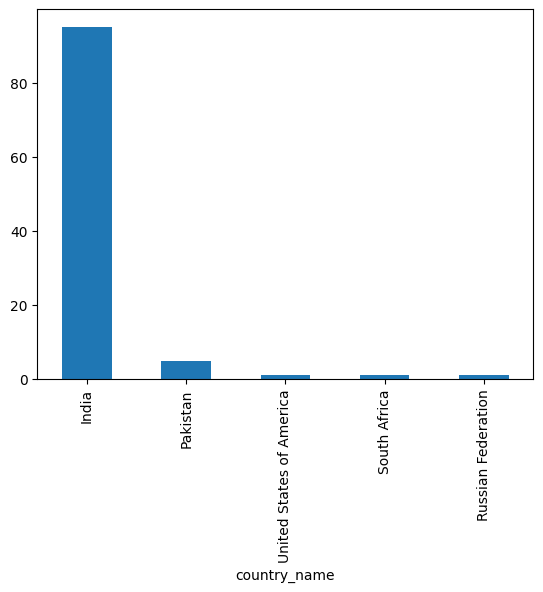

In [ ]:
maxm['country_name'].value_counts().plot.bar()

Dari 103 kota, 95 kota tercemar berada di India, 5 kota berada di Pakistan dan kota-kota lainnya masing-masing berasal dari Amerika Serikat, Afrika Selatan, dan Federasi Rusia.

In [ ]:
good_AQI_Country=df[df['aqi_value'] <=50]
good_AQI_Country['country_name'].value_counts()

country_name
Brazil                      1125
Russian Federation          1025
United States of America    1001
Germany                      717
Japan                        432
                            ... 
Dominican Republic             1
Jamaica                        1
Senegal                        1
Solomon Islands                1
Belize                         1
Name: count, Length: 139, dtype: int64

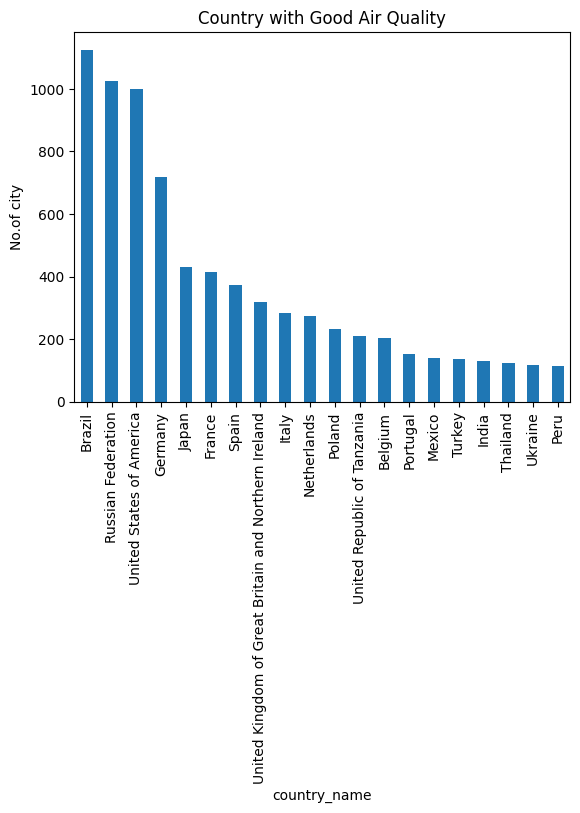

In [ ]:
good_AQI_Country['country_name'].value_counts().head(20).plot.bar()
plt.title('Country with Good Air Quality')
plt.ylabel('No.of city')
plt.show()

Sebagian besar kota dengan kualitas Good Air berada di Brasil.

1.125 kota di Brasil memiliki kualitas udara yang baik.

Federasi Rusia berada di urutan kedua negara dengan kualitas udara yang baik.

AS, Jerman berada di peringkat ke-3 dan ke-4

In [ ]:
df['co_aqi_value\t'].value_counts()

co_aqi_value\t
1      14867
0       3110
2       3012
3       1205
4        656
5        234
6        113
7         66
9         39
8         38
10        30
11        16
12        16
15        11
13        10
16         8
14         5
21         4
19         3
23         2
22         2
20         2
28         2
18         2
41         1
36         1
49         1
35         1
27         1
51         1
67         1
133        1
31         1
17         1
Name: count, dtype: int64

In [ ]:
df[df['co_aqi_value\t']>50]

,country_name,city_name,aqi_value,aqi_category,co_aqi_value\t,co_aqi_category,ozone_aqi_value,ozone_aqi_category,no2_aqi_value,no2_aqi_category,pm2.5_aqi_value,pm2.5_aqi_category
5156,United States of America,Durango,500,Hazardous,133,Unhealthy for Sensitive Groups,0,Good,53,Moderate,500,Hazardous
12800,Malaysia,Miri,209,Very Unhealthy,67,Moderate,209,Very Unhealthy,2,Good,157,Unhealthy
13398,Democratic Republic of the Congo,Kasongo Lunda,481,Hazardous,51,Moderate,39,Good,7,Good,446,Hazardous


Nilai CO AQI Kota Durango Amerika Serikat Jauh Lebih Tinggi Dibandingkan Kota Lainnya. Ini Tidak Sehat Bagi Kelompok Sensitif

Nilai CO AQI kota Durango sebesar 133

Nilai CO AQI di dua kota tersebut tergolong sedang. Miri dan Kasongo Lunda adalah kota-kota tersebut.

Semua kota selain Durango, Miri dan Kasongo Lunda mempunyai Nilai CO AQI yang baik.

Sebagian besar kota (14593) CO AQI adalah 1

In [ ]:
df['ozone_aqi_value'].value_counts()

ozone_aqi_value
30     713
32     684
29     671
28     664
33     663
      ... 
199      1
189      1
222      1
235      1
214      1
Name: count, Length: 213, dtype: int64

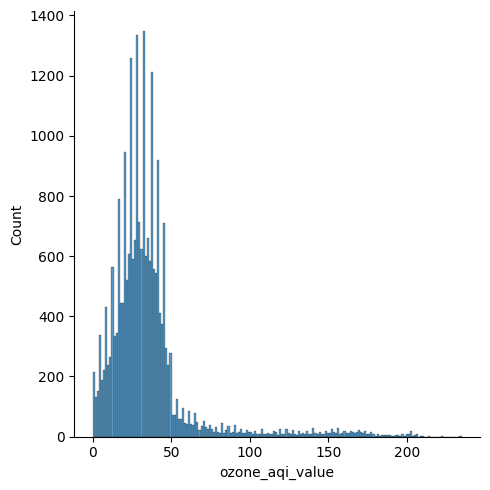

In [ ]:
sns.displot(df['ozone_aqi_value'])

In [ ]:
df[df['ozone_aqi_value']>100]['city_name'].count()

935

In [ ]:
df[df['ozone_aqi_value']>200]['city_name'].count()

53

Sebagian besar Nilai AQI Ozon kota adalah antara 0 hingga 50 dan itu merupakan AQI Ozon yang baik.
935 kota memiliki AQI Ozon yang tidak sehat dan 53 kota memiliki AQI Ozon yang sangat tidak sehat.

In [ ]:
df['no2_aqi_value'].value_counts()

no2_aqi_value
0     8242
1     4665
2     2715
3     1892
4     1265
5      882
6      665
7      482
8      405
9      298
10     271
11     223
12     184
13     172
15     120
14     118
18     101
16      88
19      85
17      79
20      67
22      49
21      48
23      44
25      32
24      30
26      28
27      24
30      23
28      22
31      18
29      17
34      15
33      14
36      12
35      10
39       8
37       6
47       4
41       4
32       4
48       3
59       3
44       3
51       3
46       3
40       2
52       2
38       2
49       2
91       1
64       1
58       1
63       1
53       1
61       1
42       1
69       1
43       1
Name: count, dtype: int64

<ipython-input-22-42412c0379b0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['no2_aqi_value'])


<Axes: xlabel='no2_aqi_value', ylabel='Density'>

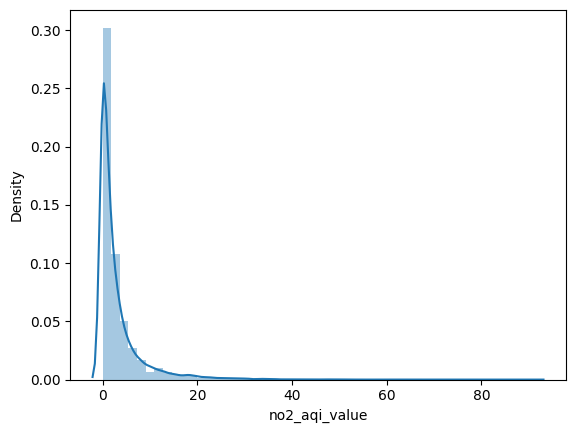

In [ ]:
sns.distplot(df['no2_aqi_value'])

In [ ]:
df[df['no2_aqi_value']>50]

,country_name,city_name,aqi_value,aqi_category,co_aqi_value\t,co_aqi_category,ozone_aqi_value,ozone_aqi_category,no2_aqi_value,no2_aqi_category,pm2.5_aqi_value,pm2.5_aqi_category
1311,Indonesia,Leuwiliang,264,Very Unhealthy,15,Good,8,Good,52,Moderate,264,Very Unhealthy
1402,Republic of Korea,Seoul,421,Hazardous,27,Good,0,Good,91,Moderate,415,Hazardous
2972,China,Jiangdu,214,Very Unhealthy,13,Good,1,Good,59,Moderate,214,Very Unhealthy
3887,Algeria,Algiers,154,Unhealthy,10,Good,33,Good,69,Moderate,154,Unhealthy
4890,Indonesia,Curug,281,Very Unhealthy,15,Good,6,Good,59,Moderate,281,Very Unhealthy
4948,Indonesia,Pandegelang,195,Unhealthy,8,Good,17,Good,51,Moderate,195,Unhealthy
5156,United States of America,Durango,500,Hazardous,133,Unhealthy for Sensitive Groups,0,Good,53,Moderate,500,Hazardous
8316,China,Cholan,168,Unhealthy,5,Good,0,Good,61,Moderate,168,Unhealthy
8328,China,Xiaolingwei,198,Unhealthy,12,Good,1,Good,52,Moderate,198,Unhealthy
9922,China,Yizheng,199,Unhealthy,12,Good,0,Good,59,Moderate,199,Unhealthy


Sebagian besar nilai AQI NO2 kota adalah b/w 0 dan 10 .

Banyak kota yang mempunyai nilai NO2 AQi yang baik.

beberapa kota masuk dalam kategori sedang.

In [ ]:
df[df['pm2.5_aqi_value']>100]

,country_name,city_name,aqi_value,aqi_category,co_aqi_value\t,co_aqi_category,ozone_aqi_value,ozone_aqi_category,no2_aqi_value,no2_aqi_category,pm2.5_aqi_value,pm2.5_aqi_category
9,Egypt,Qalyub,142,Unhealthy for Sensitive Groups,3,Good,89,Moderate,9,Good,142,Unhealthy for Sensitive Groups
12,India,Radaur,158,Unhealthy,3,Good,139,Unhealthy for Sensitive Groups,1,Good,158,Unhealthy
13,Pakistan,Radhan,158,Unhealthy,1,Good,50,Good,1,Good,158,Unhealthy
16,India,Rajgir,154,Unhealthy,3,Good,100,Unhealthy for Sensitive Groups,2,Good,154,Unhealthy
19,India,Phulabani,161,Unhealthy,2,Good,71,Moderate,0,Good,161,Unhealthy
...,...,...,...,...,...,...,...,...,...,...,...,...
23429,Mexico,Tlaltelulco,181,Unhealthy,3,Good,2,Good,11,Good,181,Unhealthy
23436,Nigeria,Hadejia,141,Unhealthy for Sensitive Groups,4,Good,42,Good,2,Good,141,Unhealthy for Sensitive Groups
23439,Venezuela (Bolivarian Republic of),Villa De Cura,131,Unhealthy for Sensitive Groups,2,Good,9,Good,10,Good,131,Unhealthy for Sensitive Groups
23449,China,Wangqing,101,Unhealthy for Sensitive Groups,3,Good,35,Good,2,Good,101,Unhealthy for Sensitive Groups


In [ ]:
df['pm2.5_aqi_value'].value_counts()

pm2.5_aqi_value
50     483
54     427
52     414
51     411
53     376
      ... 
370      1
256      1
441      1
353      1
253      1
Name: count, Length: 383, dtype: int64

In [ ]:
df['pm2.5_aqi_category'].value_counts()

pm2.5_aqi_category
Good                              10208
Moderate                           9075
Unhealthy                          2129
Unhealthy for Sensitive Groups     1624
Very Unhealthy                      255
Hazardous                           172
Name: count, dtype: int64

<Axes: xlabel='pm2.5_aqi_category'>

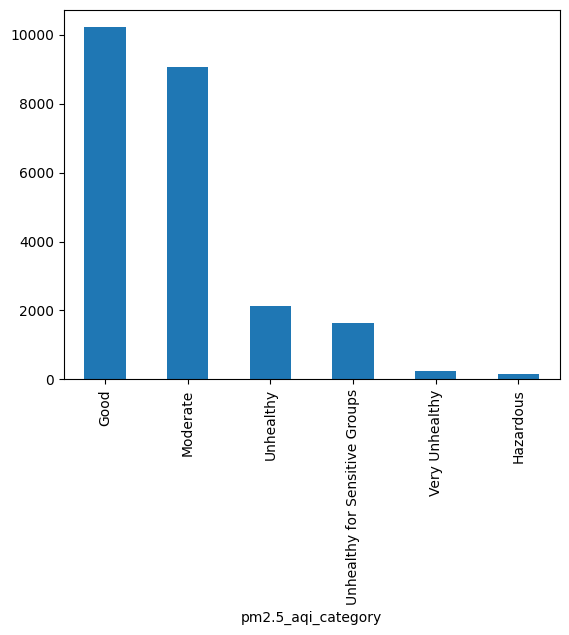

In [ ]:
df['pm2.5_aqi_category'].value_counts().plot.bar()

sebagian besar kota memiliki nilai PM2.5 AQI yang baik (9950 kota)

8939 kota mempunyai nilai PM2.5 AQI Sedang dan 172 kota mempunyai nilai PM2.5 AQI Berbahaya

<ipython-input-28-89127abf33b0>:12: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


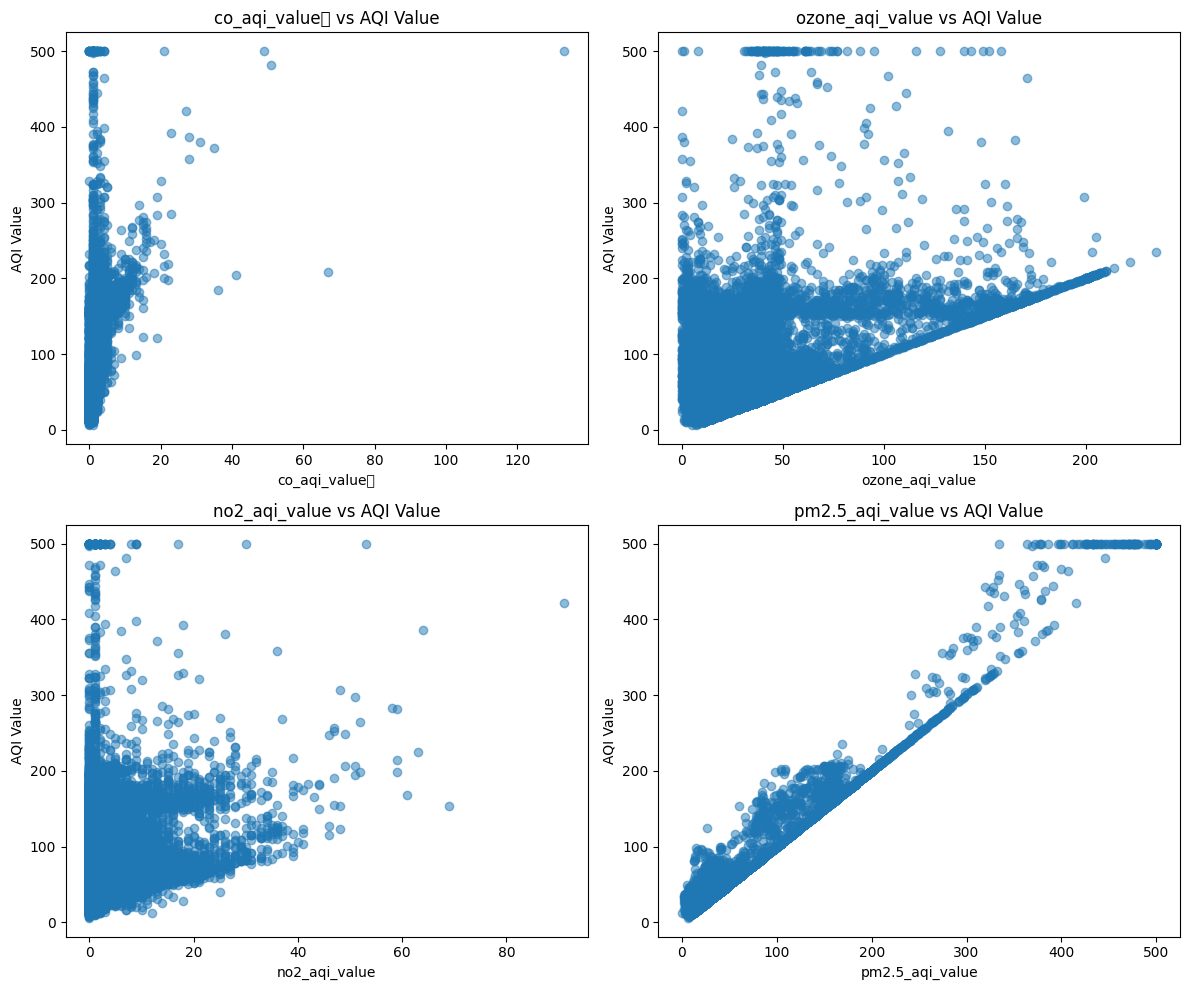

In [ ]:
pollutants = ['co_aqi_value\t', 'ozone_aqi_value', 'no2_aqi_value', 'pm2.5_aqi_value']
aqi_values = df['aqi_value']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

for i, ax in enumerate(axes.flat):
    ax.scatter(df[pollutants[i]], aqi_values, alpha=0.5)
    ax.set_xlabel(pollutants[i])
    ax.set_ylabel('AQI Value')
    ax.set_title(f'{pollutants[i]} vs AQI Value')

plt.tight_layout()
plt.show()

dalam plot sebar nilai PM2.5, pola dan titik-titik yang jelas diselaraskan, kemungkinan menunjukkan kontribusi signifikan polutan tersebut terhadap kualitas udara secara keseluruhan.

CO dan Ozon memberikan sedikit kontribusi polutan tersebut terhadap kualitas udara secara keseluruhan.

In [ ]:
df.corr(numeric_only=True)

,aqi_value,co_aqi_value\t,ozone_aqi_value,no2_aqi_value,pm2.5_aqi_value
aqi_value,1.000000,0.430602,0.405310,0.231758,0.984327
co_aqi_value\t,0.430602,1.000000,0.145724,0.488092,0.438557
ozone_aqi_value,0.405310,0.145724,1.000000,-0.181818,0.339887
no2_aqi_value,0.231758,0.488092,-0.181818,1.000000,0.260127
pm2.5_aqi_value,0.984327,0.438557,0.339887,0.260127,1.000000


Nilai AQI PM2.5 dan Nilai AQI nampaknya mempunyai korelasi positif yang kuat, artinya PM2.5 berpengaruh langsung terhadap pencemaran udara.

AQI memiliki hubungan positif yang lemah dengan Karbon monoksida dan Ozon.

# Kesimpulan
Kualitas Udara Secara Keseluruhan: Mayoritas kota menunjukkan kualitas udara yang baik, sementara sebagian besar kota mengalami kondisi sedang hingga tidak sehat, dan sebagian kecil kota mencapai tingkat yang sangat tidak sehat dan berbahaya.

Kesenjangan Regional: India memiliki sejumlah besar kota dengan nilai AQI yang tinggi, yang menunjukkan masalah polusi yang parah, sementara Brasil memiliki kota-kota dengan kualitas udara yang baik.

Kontribusi Polutan: PM2.5 muncul sebagai polutan penting yang mempengaruhi kualitas udara secara keseluruhan, dengan korelasi positif yang jelas dengan AQI. Polutan lain seperti CO dan Ozon juga berperan, meskipun pada tingkat yang lebih rendah.

Analisis Korelasi: Nilai AQI PM2.5 menunjukkan korelasi positif yang kuat dengan AQI secara keseluruhan, yang menunjukkan dampak signifikan terhadap tingkat polusi udara. Sementara itu, Karbon Monoksida dan Ozon menunjukkan korelasi yang lebih lemah dengan AQI.

# PREPROCESSING

In [ ]:
print(df.isnull().sum())


country_name          427
city_name               1
aqi_value               0
aqi_category            0
co_aqi_value\t          0
co_aqi_category         0
ozone_aqi_value         0
ozone_aqi_category      0
no2_aqi_value           0
no2_aqi_category        0
pm2.5_aqi_value         0
pm2.5_aqi_category      0
dtype: int64


In [ ]:
df.head()

,country_name,city_name,aqi_value,aqi_category,co_aqi_value\t,co_aqi_category,ozone_aqi_value,ozone_aqi_category,no2_aqi_value,no2_aqi_category,pm2.5_aqi_value,pm2.5_aqi_category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


In [ ]:
# Menghapus entri yang tidak relevan atau duplikat
df_cleaned = df.drop_duplicates()

# Menangani nilai yang hilang dengan mengisi atau menghapusnya
df_cleaned.dropna(inplace=True)  # Menghapus baris dengan nilai yang hilang
df_cleaned.head()


,country_name,city_name,aqi_value,aqi_category,co_aqi_value\t,co_aqi_category,ozone_aqi_value,ozone_aqi_category,no2_aqi_value,no2_aqi_category,pm2.5_aqi_value,pm2.5_aqi_category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


In [ ]:
# Mengubah kolom 'co_aqi_value\t' menjadi 'co_aqi_value'
df_cleaned.rename(columns={'co_aqi_value\t': 'co_aqi_value'}, inplace=True)

In [ ]:
# Memilih fitur-fitur yang akan digunakan untuk clustering
df_drop = df_cleaned[['aqi_value', 'co_aqi_value', 'ozone_aqi_value', 'no2_aqi_value','pm2.5_aqi_value']]
# df_drop=df_cleaned.drop(['country_name', 'city_name', 'aqi_category', 'co_aqi_category', 'ozone_aqi_category', 'no2_aqi_category', 'pm2.5_aqi_category'], axis=1)

In [ ]:
df_drop.head(10)

,aqi_value,co_aqi_value,ozone_aqi_value,no2_aqi_value,pm2.5_aqi_value
0,51,1,36,0,51
1,41,1,5,1,41
2,66,1,39,2,66
3,34,1,34,0,20
4,22,0,22,0,6
5,54,1,14,11,54
6,62,1,35,3,62
7,64,1,29,7,64
8,54,1,41,1,54
9,142,3,89,9,142


In [ ]:
# from sklearn.preprocessing import StandardScaler

# # Handling outliers using IQR method for numeric columns only
# numeric_cols = df_drop.select_dtypes(include=['number']).columns.tolist()
# Q1 = df_drop[numeric_cols].quantile(0.25)
# Q3 = df_drop[numeric_cols].quantile(0.75)
# IQR = Q3 - Q1
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR
# df_outliers_removed = df_drop[~((df_drop[numeric_cols] < lower_bound) | (df_drop[numeric_cols] > upper_bound)).any(axis=1)]
# df_outliers_removed.head(100)



In [ ]:
# # Scaling the numeric data
# scaler = StandardScaler()
# df_outliers_removed_scaled = scaler.fit_transform(df_outliers_removed[numeric_cols])

# # Combine scaled numeric data with categorical columns
# df_scaled = pd.concat([pd.DataFrame(df_outliers_removed_scaled, columns=numeric_cols, index=df_outliers_removed.index)], axis=1)
# df_scaled.head(50)


# from sklearn.preprocessing import MinMaxScaler

# # Scaling the numeric data using MinMaxScaler
# scaler = MinMaxScaler()
# df_drop_scaled = scaler.fit_transform(df_drop)

# # Convert the scaled data back to a DataFrame
# df_scaled = pd.DataFrame(df_drop_scaled, columns=df_drop.columns)

# # Displaying the first 50 rows of the scaled DataFrame
# df_scaled.head(10)

from sklearn.preprocessing import StandardScaler

# Scaling the numeric data using StandardScaler
scaler = StandardScaler()
df_drop_scaled = scaler.fit_transform(df_drop)

# Convert the scaled data back to a DataFrame
df_scaled = pd.DataFrame(df_drop_scaled, columns=df_drop.columns)

# Displaying the first 10 rows of the scaled DataFrame
df_scaled.head(10)


,aqi_value,co_aqi_value,ozone_aqi_value,no2_aqi_value,pm2.5_aqi_value
0,-0.378722,-0.203944,0.027132,-0.584055,-0.324822
1,-0.556154,-0.203944,-1.070757,-0.394718,-0.506455
2,-0.112575,-0.203944,0.133379,-0.205381,-0.052373
3,-0.680356,-0.203944,-0.043700,-0.584055,-0.887883
4,-0.893274,-0.745983,-0.468689,-0.584055,-1.142169
5,-0.325493,-0.203944,-0.752015,1.498650,-0.270333
6,-0.183547,-0.203944,-0.008284,-0.016045,-0.125026
7,-0.148061,-0.203944,-0.220779,0.741303,-0.088700
8,-0.325493,-0.203944,0.204211,-0.394718,-0.270333
9,1.235905,0.880134,1.904168,1.119976,1.328034


In [ ]:
# from sklearn.cluster import KMeans

# # Clustering
# kmeans = KMeans(n_clusters=4, random_state=42)
# kmeans.fit(df_scaled)

# # Adding cluster labels to the original dataframe
# df_scaled['cluster'] = kmeans.labels_


In [ ]:
from sklearn.cluster import KMeans
# import matplotlib.pyplot as plt

# # Menggunakan Elbow Method untuk menentukan jumlah cluster optimal
# inertia = []
# for k in range(1, 11):
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     kmeans.fit(df_scaled)
#     inertia.append(kmeans.inertia_)

# # Plotting Elbow Method
# plt.figure(figsize=(10, 6))
# plt.plot(range(1, 11), inertia, marker='o')
# plt.title('Elbow Method for Optimal Number of Clusters')
# plt.xlabel('Number of Clusters')
# plt.ylabel('Inertia')
# plt.show()


In [ ]:
# from sklearn.metrics import silhouette_score

# silhouette_scores = []
# for k in range(2, 11):
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     cluster_labels = kmeans.fit_predict(df_scaled)
#     silhouette_avg = silhouette_score(df_scaled, cluster_labels)
#     silhouette_scores.append(silhouette_avg)

# # Plot silhouette scores
# plt.figure(figsize=(10, 6))
# plt.plot(range(2, 11), silhouette_scores, marker='o')
# plt.title('Silhouette Score for Different Number of Clusters')
# plt.xlabel('Number of Clusters')
# plt.ylabel('Silhouette Score')
# plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

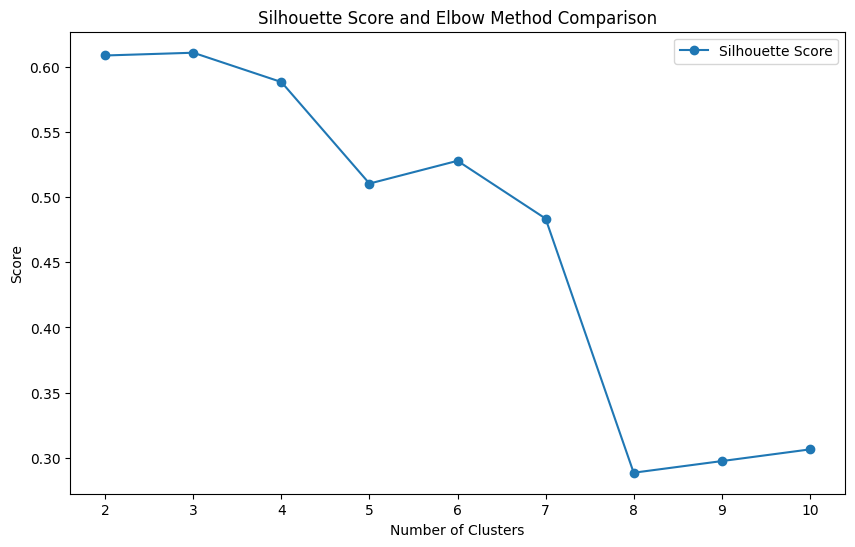

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

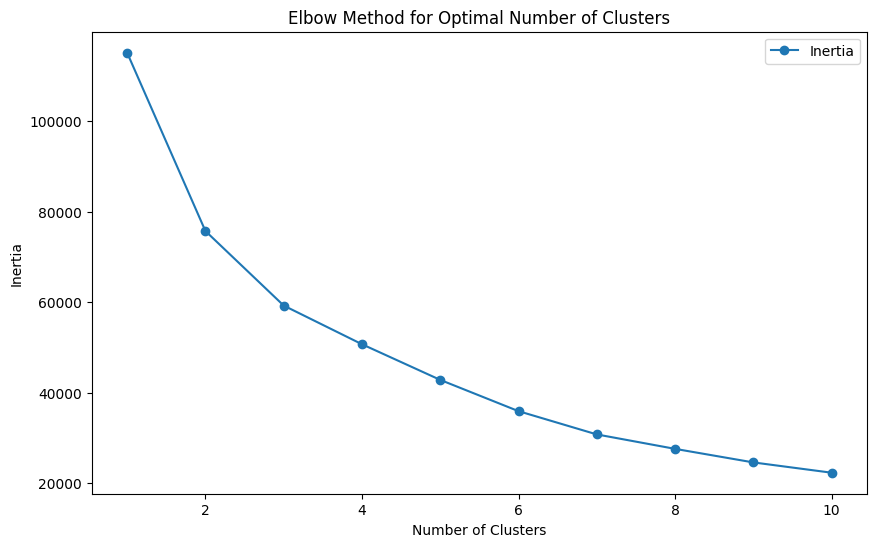

In [ ]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score for different number of clusters
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', label='Silhouette Score')
plt.title('Silhouette Score and Elbow Method Comparison')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.legend()
plt.show()

# Using Elbow Method to determine the optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', label='Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.legend()
plt.show()


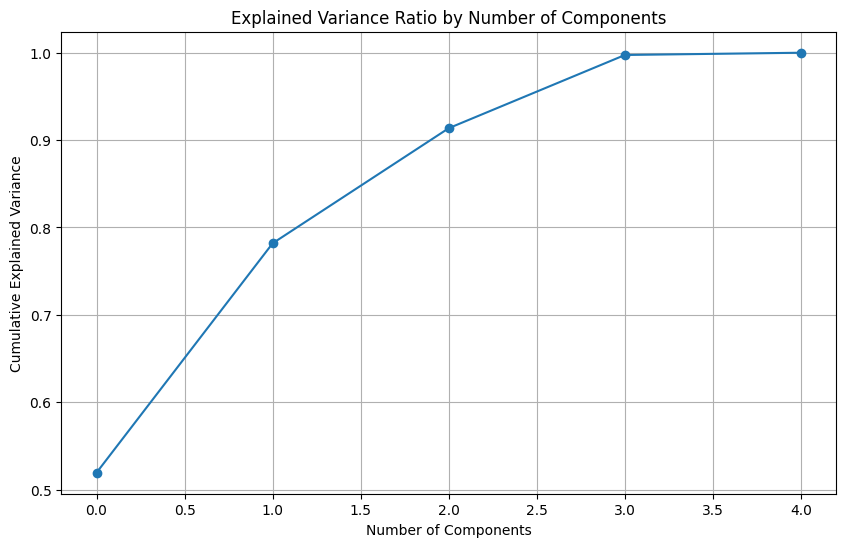

In [ ]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Inisialisasi PCA
pca = PCA()

# Fit PCA ke data
pca.fit(df_scaled)

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio by Number of Components')
plt.grid(True)
plt.show()


In [ ]:
# from sklearn.decomposition import PCA

# # Perform PCA for dimensionality reduction
# pca = PCA(n_components=2)  # You can adjust the number of components as needed
# pca_result = pca.fit_transform(df_scaled)

# # Add PCA results to the dataframe
# df_scaled['PCA1'] = pca_result[:, 0]
# df_scaled['PCA2'] = pca_result[:, 1]

# # Clustering with PCA components
# kmeans_pca = KMeans(n_clusters=3, random_state=42)
# kmeans_pca.fit(df_scaled[['PCA1', 'PCA2']])

# # Adding cluster labels to the original dataframe
# df_scaled['cluster'] = kmeans_pca.labels_

# # Visualizing the clusters with PCA
# plt.figure(figsize=(10, 6))
# for cluster in range(3):
#     cluster_data = df_scaled[df_scaled['cluster'] == cluster]
#     plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster}')

# plt.scatter(kmeans_pca.cluster_centers_[:, 0], kmeans_pca.cluster_centers_[:, 1], s=300, c='red', marker='*', label='Centroids')
# plt.title('Clusters of Air Pollution Data (with PCA)')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.legend()
# plt.show()

# # Displaying the counts of data points in each cluster with PCA
# print("Counts of data points in each cluster (with PCA):")
# print(df_scaled['cluster'].value_counts())


# # Saving the clustered data with PCA components to an Excel file
# # df_scaled.to_excel("clustered_with_PCA.xlsx", index=False)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


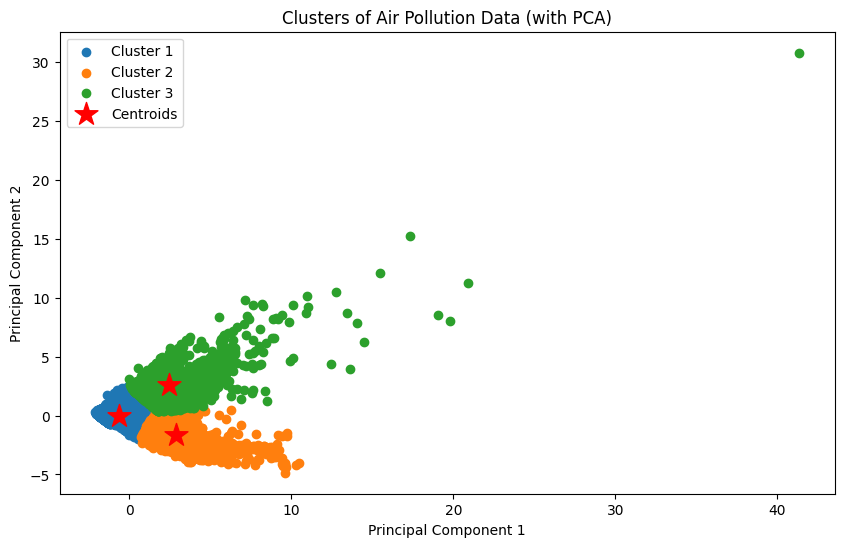

Counts of data points in each cluster (with PCA):
cluster
1    18897
2     2511
3     1627
Name: count, dtype: int64


In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Perform PCA for dimensionality reduction
pca = PCA(n_components=3)  # Ubah jumlah komponen menjadi 3
pca_result = pca.fit_transform(df_scaled)

# Menambahkan hasil PCA ke dalam DataFrame
df_scaled['PCA1'] = pca_result[:, 0]
df_scaled['PCA2'] = pca_result[:, 1]
df_scaled['PCA3'] = pca_result[:, 2]  # Menambahkan kolom untuk PCA3

# Clustering dengan PCA components
kmeans_pca = KMeans(n_clusters=3, random_state=42)
kmeans_pca.fit(df_scaled[['PCA1', 'PCA2', 'PCA3']])  # Menggunakan ketiga komponen PCA

# Menambahkan label klaster ke dalam DataFrame asli
df_scaled['cluster'] = kmeans_pca.labels_ + 1  # Mulai dari klaster 1 bukan 0

# Visualisasi klaster dengan PCA
plt.figure(figsize=(10, 6))
for cluster in range(1, 4):
    cluster_data = df_scaled[df_scaled['cluster'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster}')

plt.scatter(kmeans_pca.cluster_centers_[:, 0], kmeans_pca.cluster_centers_[:, 1], s=300, c='red', marker='*', label='Centroids')
plt.title('Clusters of Air Pollution Data (with PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Menampilkan jumlah data points dalam setiap klaster dengan PCA
print("Counts of data points in each cluster (with PCA):")
print(df_scaled['cluster'].value_counts())


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 9.4 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


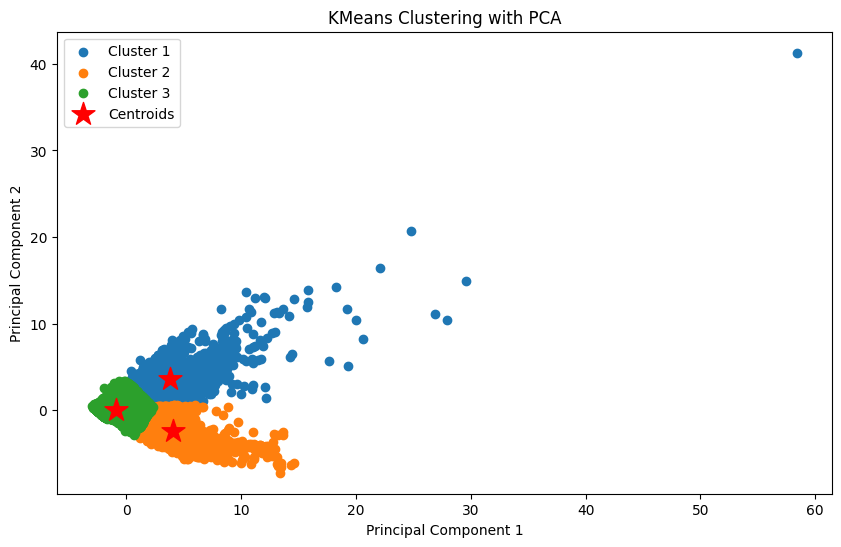

/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(


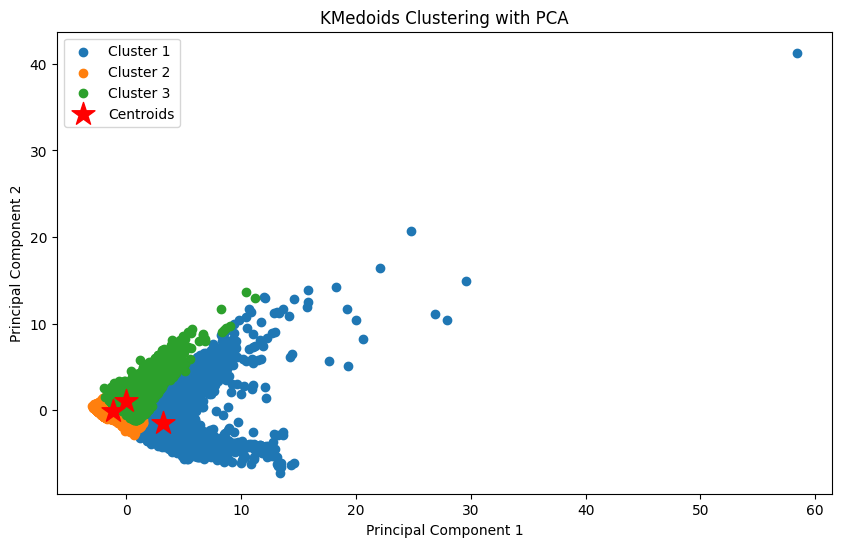

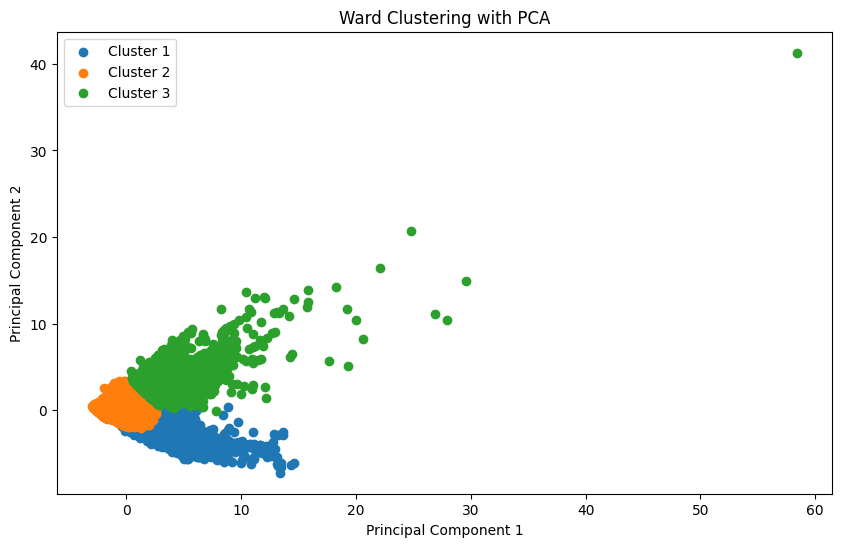

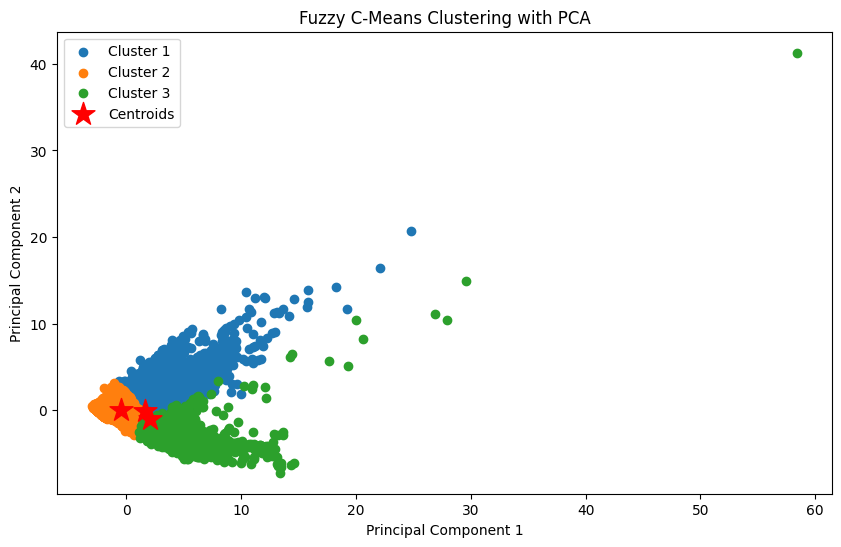

Silhouette Scores:
KMeans: 0.6419801506055678
KMedoids: 0.37494137716307413
Ward: 0.6303961425287737
Fuzzy C-Means: 0.5640841650484762
The best model is KMeans with a silhouette score of 0.6419801506055678


In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
!pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids
!!pip install scikit-fuzzy
import skfuzzy as fuzz
import matplotlib.pyplot as plt



# PCA for dimensionality reduction
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df_scaled)

# Adding PCA results to a DataFrame
df_pca = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2', 'PCA3'])

# Function to plot clusters
def plot_clusters(data, labels, centroids=None, title=''):
    plt.figure(figsize=(10, 6))
    unique_labels = np.unique(labels)
    for label in unique_labels:
        cluster_data = data[labels == label]
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {label + 1}')
    if centroids is not None:
        plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='*', label='Centroids')
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.show()

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_pca)
df_pca['kmeans_cluster'] = kmeans.labels_
kmeans_silhouette = silhouette_score(df_pca[['PCA1', 'PCA2', 'PCA3']], kmeans.labels_)
plot_clusters(pca_result, kmeans.labels_, kmeans.cluster_centers_, 'KMeans Clustering with PCA')

# KMedoids clustering
kmedoids = KMedoids(n_clusters=3, random_state=42)
kmedoids.fit(df_pca)
df_pca['kmedoids_cluster'] = kmedoids.labels_
kmedoids_silhouette = silhouette_score(df_pca[['PCA1', 'PCA2', 'PCA3']], kmedoids.labels_)
plot_clusters(pca_result, kmedoids.labels_, kmedoids.cluster_centers_, 'KMedoids Clustering with PCA')

# Ward clustering (Agglomerative Clustering with Ward linkage)
ward = AgglomerativeClustering(n_clusters=3, linkage='ward')
ward_labels = ward.fit_predict(df_pca[['PCA1', 'PCA2', 'PCA3']])
df_pca['ward_cluster'] = ward_labels
ward_silhouette = silhouette_score(df_pca[['PCA1', 'PCA2', 'PCA3']], ward_labels)
plot_clusters(pca_result, ward_labels, title='Ward Clustering with PCA')

# Fuzzy C-Means clustering
cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(df_pca[['PCA1', 'PCA2', 'PCA3']].T, 3, 2, error=0.005, maxiter=1000, init=None)
fcm_labels = np.argmax(u, axis=0)
df_pca['fcm_cluster'] = fcm_labels
fcm_silhouette = silhouette_score(df_pca[['PCA1', 'PCA2', 'PCA3']], fcm_labels)
plot_clusters(pca_result, fcm_labels, cntr.T, 'Fuzzy C-Means Clustering with PCA')

# Silhouette scores for each model
print("Silhouette Scores:")
print(f"KMeans: {kmeans_silhouette}")
print(f"KMedoids: {kmedoids_silhouette}")
print(f"Ward: {ward_silhouette}")
print(f"Fuzzy C-Means: {fcm_silhouette}")

# Determine the best model
best_model = max([(kmeans_silhouette, 'KMeans'),
                  (kmedoids_silhouette, 'KMedoids'),
                  (ward_silhouette, 'Ward'),
                  (fcm_silhouette, 'Fuzzy C-Means')], key=lambda x: x[0])
print(f"The best model is {best_model[1]} with a silhouette score of {best_model[0]}")


In [ ]:
# Menambahkan kolom baru 'negarakota' dari gabungan 'city_name' dan 'country_name'
df_cleaned['negarakota'] = df_cleaned['city_name'] + ', ' + df_cleaned['country_name']

# Menambahkan label klaster ke DataFrame asli
df_cleaned['cluster'] = kmeans_pca.labels_+1

# Menampilkan DataFrame dengan label klaster
df_cleaned.head()


,country_name,city_name,aqi_value,aqi_category,co_aqi_value,co_aqi_category,ozone_aqi_value,ozone_aqi_category,no2_aqi_value,no2_aqi_category,pm2.5_aqi_value,pm2.5_aqi_category,negarakota,cluster
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate,"Praskoveya, Russian Federation",1
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,"Presidente Dutra, Brazil",1
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate,"Priolo Gargallo, Italy",1
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good,"Przasnysz, Poland",1
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good,"Punaauia, France",1


In [ ]:
# Menyimpan data klaster dengan komponen PCA ke dalam file Excel
# df_cleaned.to_excel("clustered_standart_with_PCA.xlsx", index=False)

# Menyimpan data klaster dengan komponen PCA ke dalam file csv
# df_cleaned.to_csv("clustered_standart_with_PCA.csv", index=False)

# Menyimpan data klaster dengan komponen PCA ke dalam file csv
df_cleaned.to_csv("hasil_clustering1-3new.csv", index=False)
# df_cleaned.to_csv("hasil_clustering1-3newdelimeter.csv", sep=';', index=False)

# Menyimpan data klaster dengan komponen PCA ke dalam file csv
# df_cleaned.to_csv("hasil_clustering1-3new.xlsx", index=False)

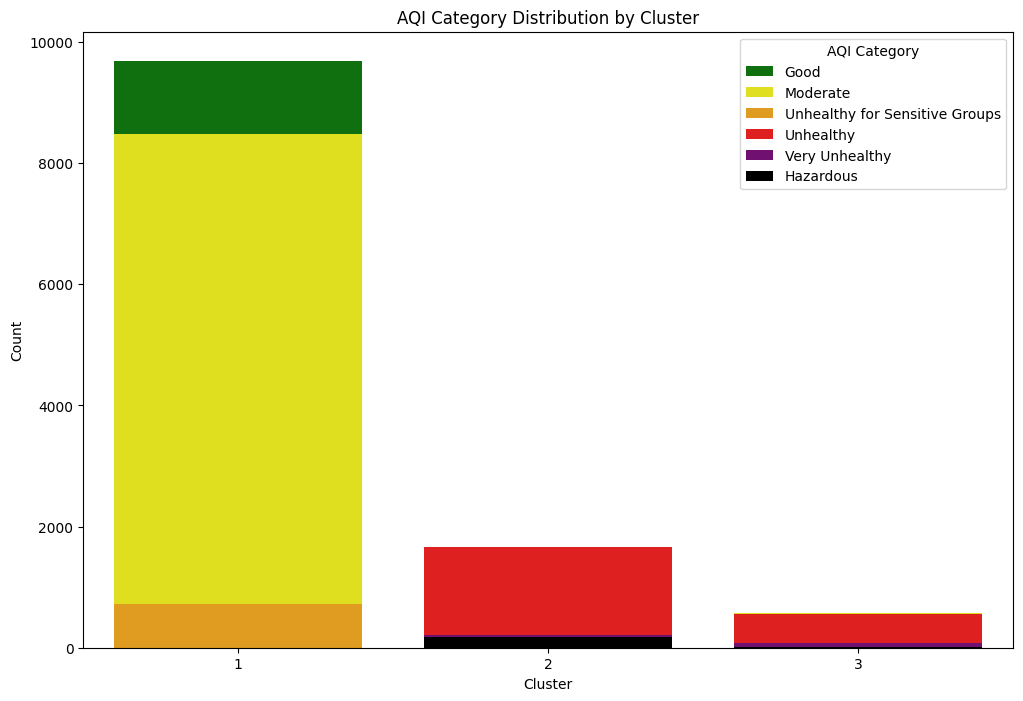

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung jumlah kategori AQI di setiap klaster
cluster_aqi_counts = df_cleaned.groupby(['cluster', 'aqi_category']).size().unstack()

# Visualisasi dengan diagram batang
plt.figure(figsize=(12, 8))
sns.barplot(data=cluster_aqi_counts.reset_index(), x='cluster', y='Good', color='green', label='Good')
sns.barplot(data=cluster_aqi_counts.reset_index(), x='cluster', y='Moderate', color='yellow', label='Moderate')
sns.barplot(data=cluster_aqi_counts.reset_index(), x='cluster', y='Unhealthy for Sensitive Groups', color='orange', label='Unhealthy for Sensitive Groups')
sns.barplot(data=cluster_aqi_counts.reset_index(), x='cluster', y='Unhealthy', color='red', label='Unhealthy')
sns.barplot(data=cluster_aqi_counts.reset_index(), x='cluster', y='Very Unhealthy', color='purple', label='Very Unhealthy')
sns.barplot(data=cluster_aqi_counts.reset_index(), x='cluster', y='Hazardous', color='black', label='Hazardous')

plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('AQI Category Distribution by Cluster')
plt.legend(title='AQI Category')
plt.show()


In [ ]:
# Hitung jumlah kategori AQI di setiap klaster tanpa visualisasi
cluster_aqi_counts = cluster_aqi_counts.fillna(0)
cluster_aqi_counts = cluster_aqi_counts.astype(int)
cluster_aqi_counts = cluster_aqi_counts.reset_index()
cluster_aqi_counts = cluster_aqi_counts.rename(columns={'Good': 'Good AQI', 'Moderate': 'Moderate AQI', 'Unhealthy for Sensitive Groups': 'Unhealthy for Sensitive Groups AQI', 'Unhealthy': 'Unhealthy AQI', 'Very Unhealthy': 'Very Unhealthy AQI', 'Hazardous': 'Hazardous AQI'})
cluster_aqi_counts = cluster_aqi_counts.rename_axis(None, axis=1)
cluster_aqi_counts = cluster_aqi_counts.rename(columns={'cluster': 'Cluster'})
cluster_aqi_counts = cluster_aqi_counts[['Cluster', 'Good AQI', 'Moderate AQI', 'Unhealthy for Sensitive Groups AQI', 'Unhealthy AQI', 'Very Unhealthy AQI', 'Hazardous AQI']]
cluster_aqi_counts = cluster_aqi_counts.sort_values(by='Cluster')
cluster_aqi_counts.reset_index(drop=True, inplace=True)
cluster_aqi_counts

,Cluster,Good AQI,Moderate AQI,Unhealthy for Sensitive Groups AQI,Unhealthy AQI,Very Unhealthy AQI,Hazardous AQI
0,1,9686,8485,723,3,0,0
1,2,0,25,436,1662,212,176
2,3,2,577,409,550,74,15


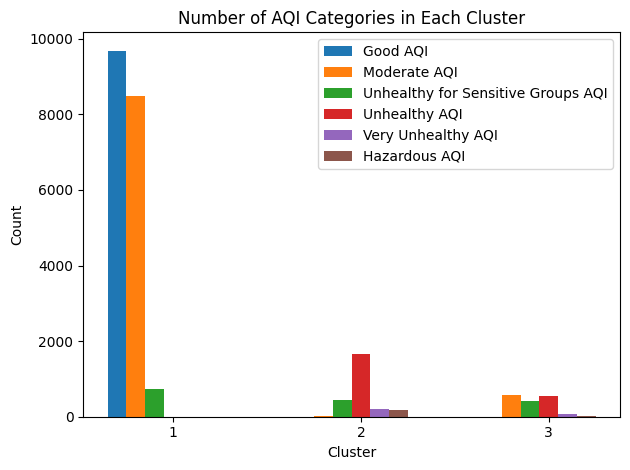

In [ ]:
import matplotlib.pyplot as plt

# Data
clusters = cluster_aqi_counts['Cluster']
good_aqi = cluster_aqi_counts['Good AQI']
moderate_aqi = cluster_aqi_counts['Moderate AQI']
usg_aqi = cluster_aqi_counts['Unhealthy for Sensitive Groups AQI']
unhealthy_aqi = cluster_aqi_counts['Unhealthy AQI']
very_unhealthy_aqi = cluster_aqi_counts['Very Unhealthy AQI']
hazardous_aqi = cluster_aqi_counts['Hazardous AQI']

# Plotting
bar_width = 0.1
index = range(len(clusters))

plt.bar(index, good_aqi, bar_width, label='Good AQI')
plt.bar([i + bar_width for i in index], moderate_aqi, bar_width, label='Moderate AQI')
plt.bar([i + 2 * bar_width for i in index], usg_aqi, bar_width, label='Unhealthy for Sensitive Groups AQI')
plt.bar([i + 3 * bar_width for i in index], unhealthy_aqi, bar_width, label='Unhealthy AQI')
plt.bar([i + 4 * bar_width for i in index], very_unhealthy_aqi, bar_width, label='Very Unhealthy AQI')
plt.bar([i + 5 * bar_width for i in index], hazardous_aqi, bar_width, label='Hazardous AQI')

plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Number of AQI Categories in Each Cluster')
plt.xticks([i + 3 * bar_width for i in index], clusters)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()


In [ ]:
import pandas as pd

def count_values_in_columns(df_cleaned, num_clusters):
    result_data = []
    columns_to_count = ['aqi_category', 'co_aqi_category',
                        'ozone_aqi_category', 'no2_aqi_category',
                        'pm2.5_aqi_category']

    for i in range(num_clusters):
        cluster_df = df_cleaned[df_cleaned['cluster'] == i]
        cluster_counts = [cluster_df[column].value_counts().rename(f'{column}')
                          for column in columns_to_count]
        cluster_counts_df = pd.concat(cluster_counts, axis=1).fillna(0).astype(int)  # Mengubah NaN menjadi 0 dan tipe data menjadi integer
        result_data.append(cluster_counts_df)

    result_df = pd.concat(result_data, keys=range(num_clusters))
    return result_df

# Contoh penggunaan fungsi
count_values_in_columns(df_cleaned, 4)


aqi_category  co_aqi_category  \
1 Good                                    9686            18897   
  Moderate                                8485                0   
  Unhealthy for Sensitive Groups           723                0   
  Unhealthy                                  3                0   
2 Unhealthy                               1662                0   
  Unhealthy for Sensitive Groups           436                0   
  Very Unhealthy                           212                0   
  Hazardous                                176                0   
  Moderate                                  25                0   
  Good                                       0             2511   
3 Moderate                                 577                2   
  Unhealthy                                550                0   
  Unhealthy for Sensitive Groups           409                1   
  Very Unhealthy                            74                0   
  Hazardous                                 15                0   
  Good                                       2             1624   

                                  ozone_aqi_category  no2_aqi_category  \
1 Good                                         18022             18897   
  Moderate                                       873                 0   
  Unhealthy for Sensitive Groups                   2                 0   
  Unhealthy                                        0                 0   
2 Unhealthy                                      404                 0   
  Unhealthy for Sensitive Groups                 483                 0   
  Very Unhealthy                                  51                 0   
  Hazardous                                        0                 0   
  Moderate                                       511                 0   
  Good                                          1062              2511   
3 Moderate                                        35                15   
  Unhealthy                                        0                 0   
  Unhealthy for Sensitive Groups                   3                 0   
  Very Unhealthy                                   1                 0   
  Hazardous                                        0                 0   
  Good                                          1588              1612   

                                  pm2.5_aqi_category  
1 Good                                          9946  
  Moderate                                      8227  
  Unhealthy for Sensitive Groups                 721  
  Unhealthy                                        3  
2 Unhealthy                                     1564  
  Unhealthy for Sensitive Groups                 471  
  Very Unhealthy                                 182  
  Hazardous                                      157  
  Moderate                                       135  
  Good                                             2  
3 Moderate                                       577  
  Unhealthy                                      551  
  Unhealthy for Sensitive Groups                 409  
  Very Unhealthy                                  73  
  Hazardous                                       15  
  Good                                             2

In [ ]:
# Hitung jumlah kategori AQI di setiap klaster
cluster_aqi_counts = df_cleaned.groupby('cluster').agg({
    'aqi_category': 'value_counts',
    'co_aqi_category': 'value_counts',
    'ozone_aqi_category': 'value_counts',
    'no2_aqi_category': 'value_counts',
    'pm2.5_aqi_category': 'value_counts'
}).fillna(0).astype(int)  # Mengubah NaN menjadi 0 dan tipe data menjadi integer

# Reset index
cluster_aqi_counts = cluster_aqi_counts.reset_index()

# Ubah nama kolom
new_columns = ['Cluster']
for column in cluster_aqi_counts.columns[1:]:
    if isinstance(column, tuple):
        new_columns.append(f'{column}')
    else:
        new_columns.append(f'{column}')
cluster_aqi_counts.columns = new_columns

# Tampilkan dalam bentuk tabel
cluster_aqi_counts

,Cluster,level_1,aqi_category,co_aqi_category,ozone_aqi_category,no2_aqi_category,pm2.5_aqi_category
0,1,Good,9686,18897,18022,18897,9946
1,1,Moderate,8485,0,873,0,8227
2,1,Unhealthy for Sensitive Groups,723,0,2,0,721
3,1,Unhealthy,3,0,0,0,3
4,2,Unhealthy,1662,0,404,0,1564
5,2,Unhealthy for Sensitive Groups,436,0,483,0,471
6,2,Very Unhealthy,212,0,51,0,182
7,2,Hazardous,176,0,0,0,157
8,2,Moderate,25,0,511,0,135
9,3,Moderate,577,2,35,15,577


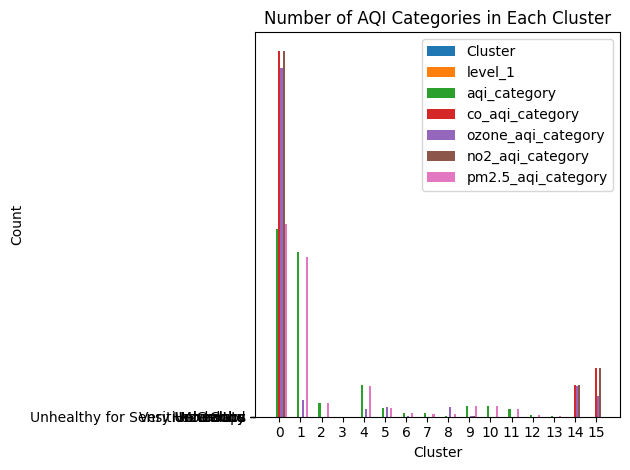

In [ ]:
import matplotlib.pyplot as plt

# Data from the result DataFrame
clusters = cluster_aqi_counts.index.get_level_values(0)  # Get the cluster labels
categories = cluster_aqi_counts.columns.get_level_values(0)  # Get the AQI categories
bar_width = 0.1
index = range(len(clusters))

# Plotting
for i, category in enumerate(categories):
    plt.bar([x + i * bar_width for x in index], cluster_aqi_counts[category], bar_width, label=category)

plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Number of AQI Categories in Each Cluster')
plt.xticks([i + (len(categories) - 1) * bar_width / 2 for i in index], clusters)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()

In [ ]:
# import matplotlib.pyplot as plt

# # Data
# clusters = cluster_aqi_counts.index.get_level_values(0)  # Get the cluster labels
# categories = cluster_aqi_counts.columns.get_level_values(0)  # Get the AQI categories
# num_clusters = len(clusters)
# num_categories = len(categories)

# # Plotting
# bar_width = 0.8 / num_categories  # Adjust the width of each segment
# index = range(num_clusters)
# colors = ['blue', 'orange', 'green', 'red', 'purple']  # Define colors for each AQI category

# plt.figure(figsize=(10, 6))

# for i, category in enumerate(categories):
#     counts = cluster_aqi_counts[category]
#     plt.bar([x + i * bar_width for x in index], counts, bar_width, label=category, color=colors[i])

# plt.xlabel('Cluster')
# plt.ylabel('Count')
# plt.title('Number of AQI Categories in Each Cluster')
# plt.xticks([i + 0.4 for i in index], clusters)  # Adjust the x-axis labels position
# plt.legend()
# plt.tight_layout()

# # Show plot
# plt.show()


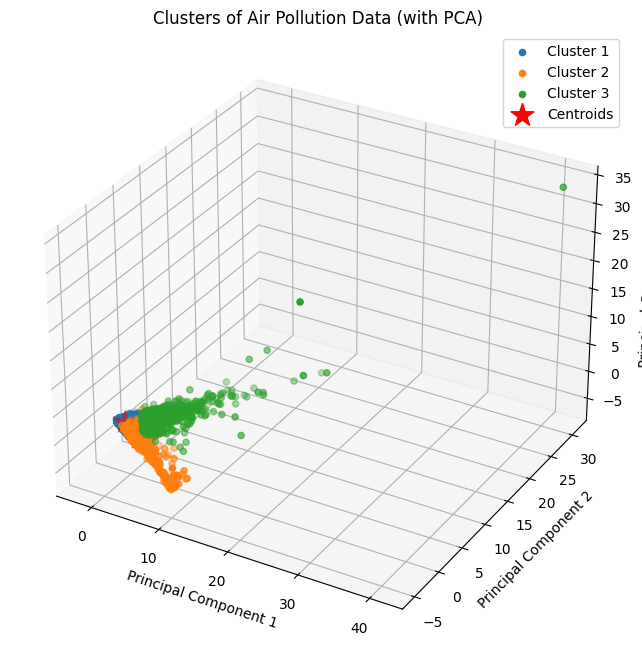

        aqi_value                                                              \
            count      mean       std       min       25%       50%       75%   
cluster                                                                         
1         18897.0 -0.350280  0.382377 -1.177164 -0.627126 -0.396465 -0.148061   
2          2511.0  1.990105  1.403686  0.277775  1.413336  1.608511  1.963374   
3          1627.0  0.996977  0.943029 -0.786815  0.224545  0.934271  1.590768   

                  co_aqi_value            ...      PCA2                PCA3  \
              max        count      mean  ...       75%        max    count   
cluster                                   ...                                 
1        1.431079      18897.0 -0.205350  ...  0.267329   2.430401  18897.0   
2        7.587954       2511.0  0.420340  ... -0.966365   0.498646   2511.0   
3        7.587954       1627.0  1.736336  ...  3.140420  30.818820   1627.0   

                                      

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Visualisasi sebaran data berdasarkan klaster dalam 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for cluster in range(1, 4):
    cluster_data = df_scaled[df_scaled['cluster'] == cluster]  # Menggunakan df_scaled
    ax.scatter(cluster_data['PCA1'], cluster_data['PCA2'], cluster_data['PCA3'], label=f'Cluster {cluster}')

ax.scatter(kmeans_pca.cluster_centers_[:, 0], kmeans_pca.cluster_centers_[:, 1], kmeans_pca.cluster_centers_[:, 2], s=300, c='red', marker='*', label='Centroids')
ax.set_title('Clusters of Air Pollution Data (with PCA)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()
plt.show()

# Statistik Deskriptif
cluster_stats = df_scaled.groupby('cluster').describe()  # Menggunakan df_scaled
print(cluster_stats)


# HASIL ANALISIS CLUSTER

**Klaster 1:**
- Klaster ini memiliki jumlah data yang paling banyak (18902 data).
- Rata-rata nilai AQI di klaster ini adalah sekitar -0.35, dengan deviasi standar sebesar 0.38.
- Nilai rata-rata CO AQI di klaster ini adalah sekitar -0.21.
- Klaster ini cenderung memiliki nilai PCA2 yang lebih tinggi, dengan nilai rata-rata sekitar 0.27.
- Terdiri dari kategori Good dan Moderate, serta beberapa data dengan kategori Unhealthy for Sensitive Groups.
- Jumlah Good AQI: 9686
- Jumlah Moderate AQI: 8485
- Jumlah Unhealthy for Sensitive Groups AQI: 727
- Jumlah Unhealthy AQI: 4
- Tidak ada Very Unhealthy AQI atau Hazardous AQI
- Klaster ini mungkin mewakili daerah-daerah dengan kualitas udara yang lebih baik, namun masih terdapat beberapa kasus sensitif yang perlu diwaspadai.

**Klaster 2:**
- Klaster ini memiliki jumlah data yang lebih sedikit (2504 data).
- Rata-rata nilai AQI di klaster ini adalah sekitar 1.99, dengan deviasi standar sebesar 1.41, menunjukkan bahwa nilai AQI di klaster ini cenderung berkisar di sekitar nilai rata-rata.
- Nilai rata-rata CO AQI di klaster ini adalah sekitar 0.42.
- Klaster ini cenderung memiliki nilai PCA2 yang lebih rendah, dengan nilai rata-rata sekitar -0.97.
- Terdiri dari sebagian besar kategori yang tidak sehat seperti Unhealthy, Very Unhealthy, dan Hazardous, serta beberapa data dengan kategori Moderate dan Unhealthy for Sensitive Groups.
- Jumlah Moderate AQI: 25
- Jumlah Unhealthy for Sensitive Groups AQI: 432
- Jumlah Unhealthy AQI: 1659
- Jumlah Very Unhealthy AQI: 212
- Jumlah Hazardous AQI: 176
- Klaster ini mungkin mewakili daerah-daerah dengan kualitas udara yang buruk.

**Klaster 3:**
- Klaster ini memiliki jumlah data yang sedang (1629 data).
- Rata-rata nilai AQI di klaster ini adalah sekitar 1.00, dengan deviasi standar sebesar 0.94.
- Nilai rata-rata CO AQI di klaster ini adalah sekitar 1.73.
- Klaster ini cenderung memiliki nilai PCA2 yang sangat tinggi, dengan nilai rata-rata sekitar 3.14, dan nilai maksimum yang sangat tinggi (30.82).
- Terdiri dari sebagian besar kategori Moderate, Unhealthy for Sensitive Groups, Unhealthy, dan Very Unhealthy serta Hazardous.
- Jumlah Moderate AQI: 577
- Jumlah Unhealthy for Sensitive Groups AQI: 409
- Jumlah Unhealthy AQI: 552
- Jumlah Very Unhealthy AQI: 74
- Jumlah Hazardous AQI: 15
- Klaster ini mungkin mencakup daerah-daerah dengan kualitas udara yang bervariasi, dari sedang hingga sangat buruk.


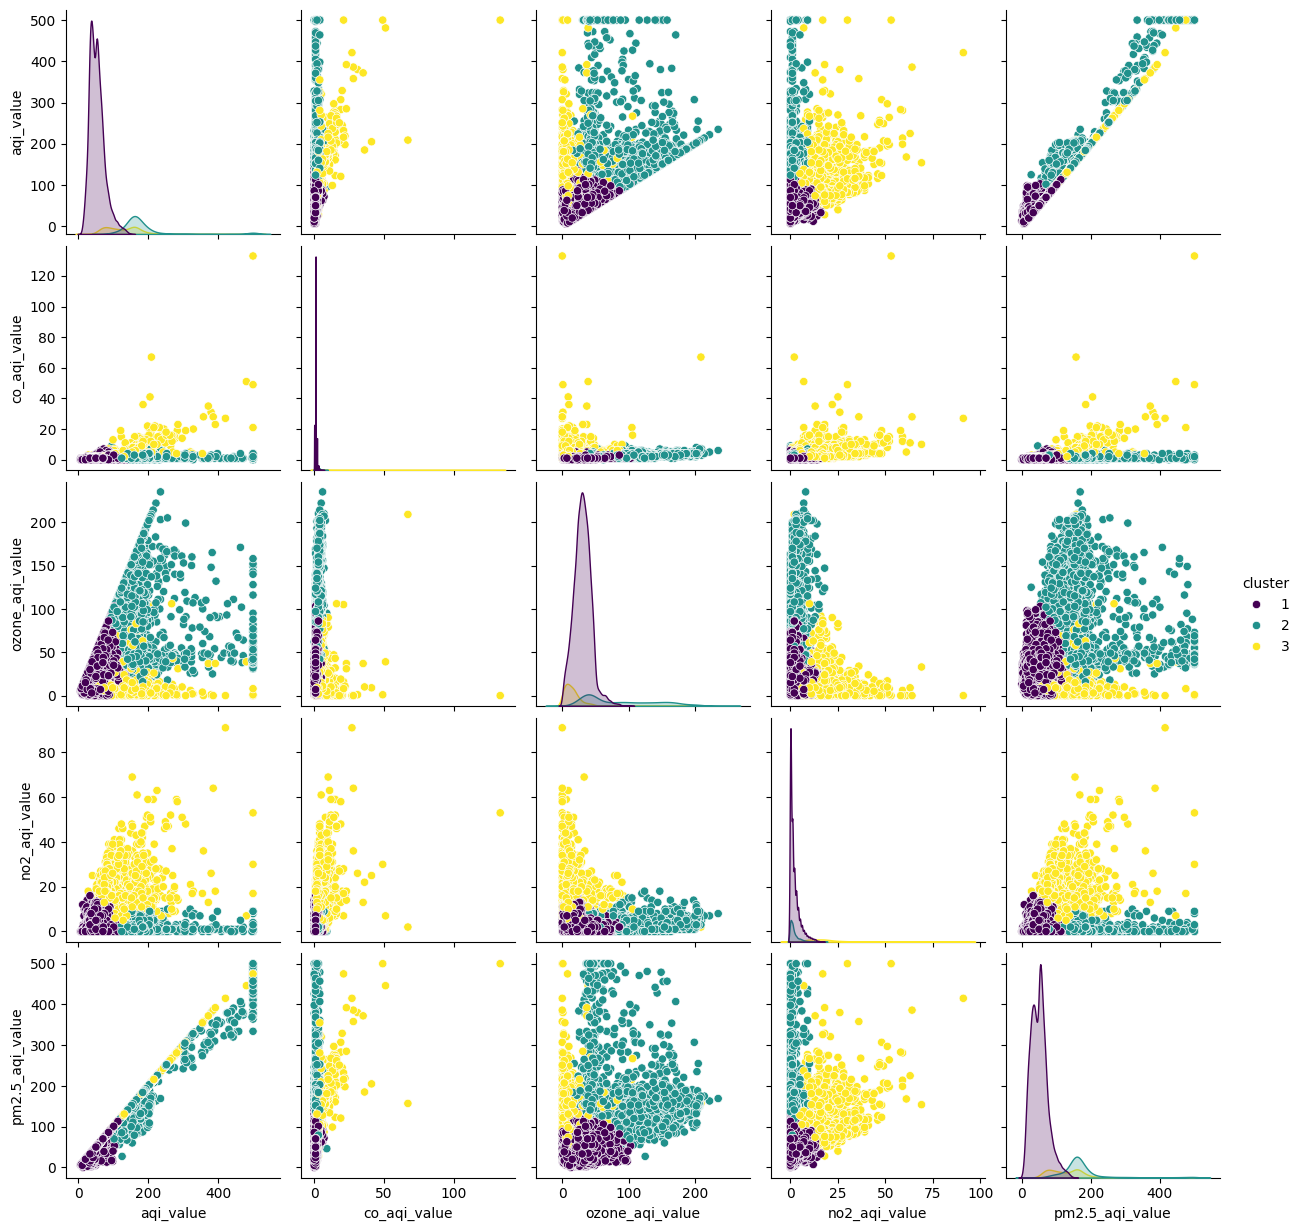

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat pairplot dengan hue berdasarkan kolom cluster
sns.pairplot(df_cleaned, hue='cluster', palette='viridis')
plt.show()



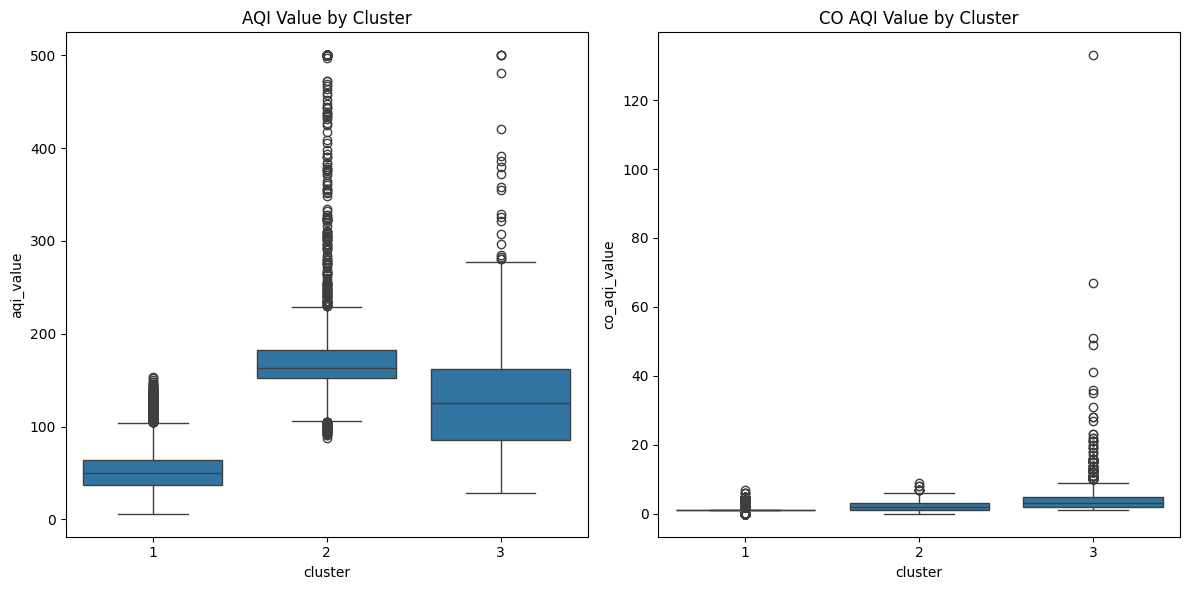

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the comparison of clusters for AQI value and CO AQI value
plt.figure(figsize=(12, 6))

# AQI Value
plt.subplot(1, 2, 1)
sns.boxplot(x='cluster', y='aqi_value', data=df_cleaned)
plt.title('AQI Value by Cluster')

# CO AQI Value
plt.subplot(1, 2, 2)
sns.boxplot(x='cluster', y='co_aqi_value', data=df_cleaned)
plt.title('CO AQI Value by Cluster')

plt.tight_layout()
plt.show()


# Perbedaan cluster 1,2,3 berdasarkan fitur

In [ ]:
# Filter data untuk Cluster 1, Cluster 2, dan Cluster 3
cluster_1_data = df_cleaned[df_cleaned['cluster'] == 1]
cluster_2_data = df_cleaned[df_cleaned['cluster'] == 2]
cluster_3_data = df_cleaned[df_cleaned['cluster'] == 3]

# Hitung statistik deskriptif untuk setiap cluster
cluster_1_stats = cluster_1_data[['aqi_value', 'co_aqi_value', 'ozone_aqi_value', 'no2_aqi_value', 'pm2.5_aqi_value']].describe()
cluster_2_stats = cluster_2_data[['aqi_value', 'co_aqi_value', 'ozone_aqi_value', 'no2_aqi_value', 'pm2.5_aqi_value']].describe()
cluster_3_stats = cluster_3_data[['aqi_value', 'co_aqi_value', 'ozone_aqi_value', 'no2_aqi_value', 'pm2.5_aqi_value']].describe()

# Tampilkan statistik deskriptif untuk Cluster 1, Cluster 2, dan Cluster 3
print("Descriptive Statistics for Cluster 1:")
print(cluster_1_stats)
print("\nDescriptive Statistics for Cluster 2:")
print(cluster_2_stats)
print("\nDescriptive Statistics for Cluster 3:")
print(cluster_3_stats)


Descriptive Statistics for Cluster 1:
          aqi_value  co_aqi_value  ozone_aqi_value  no2_aqi_value  \
count  18897.000000  18897.000000     18897.000000   18897.000000   
mean      52.603006      0.997407        30.134201       2.023655   
std       21.550678      0.603005        13.099873       2.695729   
min        6.000000      0.000000         0.000000       0.000000   
25%       37.000000      1.000000        22.000000       0.000000   
50%       50.000000      1.000000        30.000000       1.000000   
75%       64.000000      1.000000        38.000000       3.000000   
max      153.000000      7.000000       103.000000      17.000000   

       pm2.5_aqi_value  
count     18897.000000  
mean         49.645605  
std          23.996174  
min           0.000000  
25%          32.000000  
50%          49.000000  
75%          63.000000  
max         153.000000  

Descriptive Statistics for Cluster 2:
         aqi_value  co_aqi_value  ozone_aqi_value  no2_aqi_value  \
count  2

<ipython-input-59-f40334a7ec6b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1_data['Cluster'] = 'Cluster 1'
<ipython-input-59-f40334a7ec6b>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_2_data['Cluster'] = 'Cluster 2'
<ipython-input-59-f40334a7ec6b>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

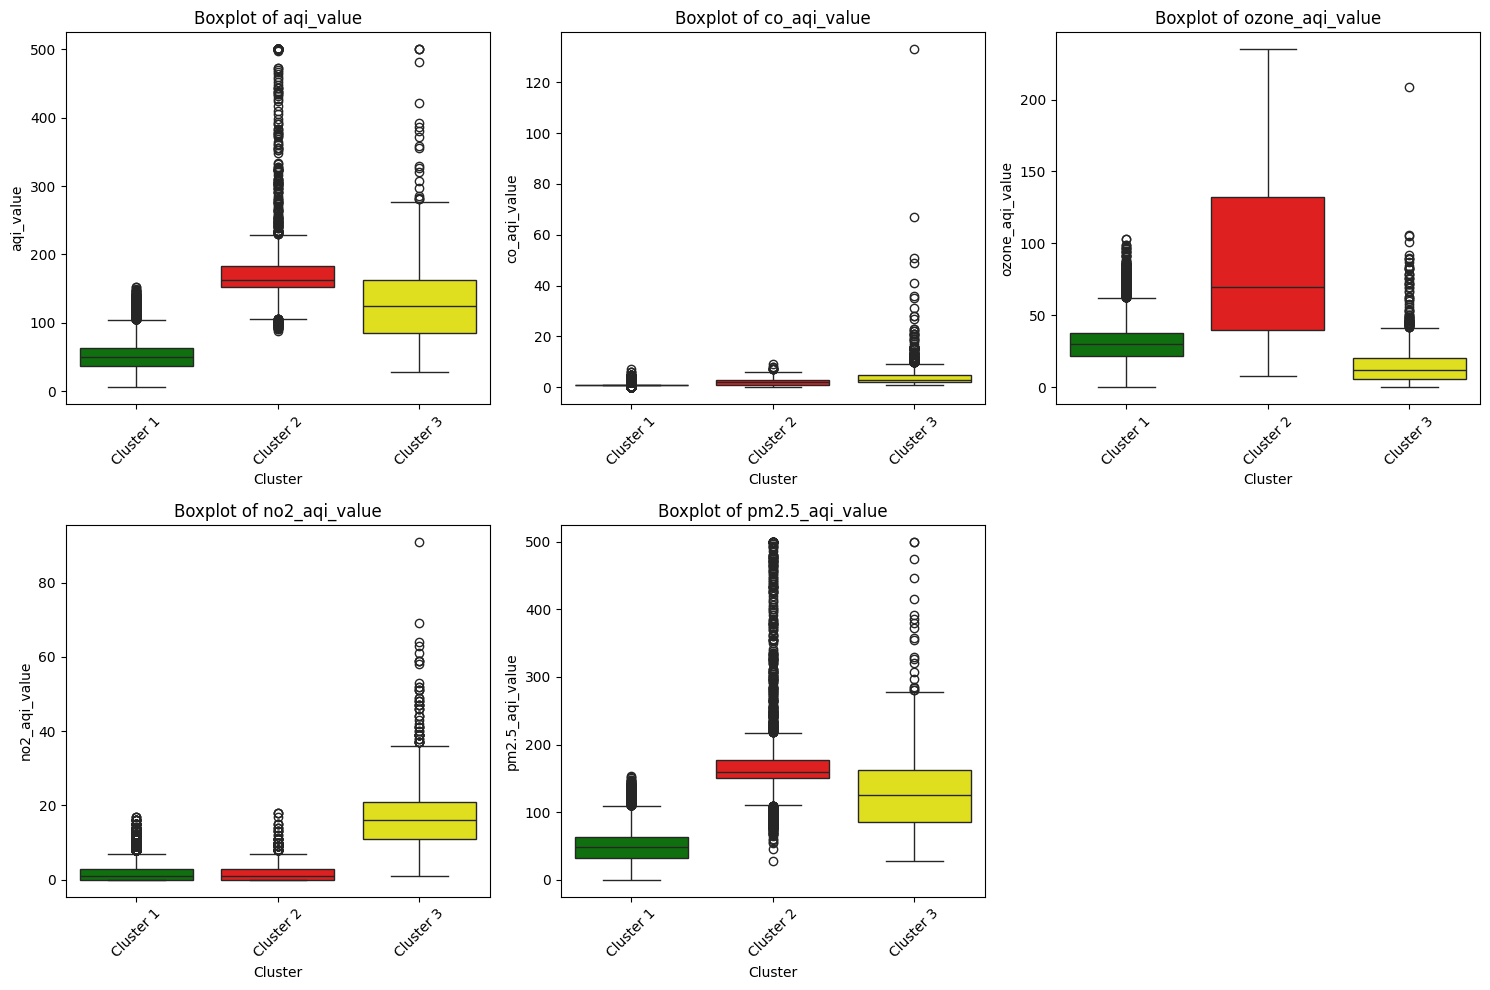

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_cleaned is already defined and cleaned

# Filter data untuk Cluster 1, Cluster 2, dan Cluster 3
cluster_1_data = df_cleaned[df_cleaned['cluster'] == 1]
cluster_2_data = df_cleaned[df_cleaned['cluster'] == 2]
cluster_3_data = df_cleaned[df_cleaned['cluster'] == 3]

# Gabungkan data untuk mempermudah plotting
cluster_1_data['Cluster'] = 'Cluster 1'
cluster_2_data['Cluster'] = 'Cluster 2'
cluster_3_data['Cluster'] = 'Cluster 3'

combined_data = pd.concat([cluster_1_data, cluster_2_data, cluster_3_data])

# Atur ukuran plot
plt.figure(figsize=(15, 10))

# List of variables
variables = ['aqi_value', 'co_aqi_value', 'ozone_aqi_value', 'no2_aqi_value', 'pm2.5_aqi_value']

# Define color palette
palette = {'Cluster 1': 'green', 'Cluster 2': 'red', 'Cluster 3': 'yellow'}

# Buat boxplot untuk setiap variabel
for i, var in enumerate(variables):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='Cluster', y=var, data=combined_data, palette=palette)
    plt.title(f'Boxplot of {var}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



## Perbedaan cluster 1, 2, dan 3

### Klaster 1:
- Rata-rata AQI sekitar 52, dengan variasi dari 6 hingga 153.
- Tingkat CO rata-rata rendah (0.99), menunjukkan polusi CO yang umumnya rendah.
- Tingkat polusi ozon rata-rata lebih rendah (30) dibandingkan dengan klaster lainnya.
- Tingkat NO2 rata-rata sekitar 2, dengan variasi dari 0 hingga 17.
- Tingkat PM2.5 rata-rata sekitar 49.

### Klaster 2:
- Rata-rata tingkat polusi udara (AQI) sekitar 184, dengan variasi yang besar dari 88 hingga 500.
- Rata-rata tingkat CO lebih rendah dari klaster lainnya, tetapi ada nilai maksimum yang cukup tinggi (9).
- Tingkat polusi ozon cenderung tinggi dengan rata-rata sekitar 86.
- Tingkat NO2 rata-rata relatif rendah (1.85), tapi ada beberapa titik dengan tingkat yang cukup tinggi (18).
- Tingkat PM2.5 cenderung tinggi dengan rata-rata sekitar 175.


### Klaster 3:
- Rata-rata AQI sekitar 128, dengan variasi dari 28 hingga 500.
- Tingkat CO rata-rata lebih tinggi (4.58) dibandingkan klaster lainnya.
- Tingkat polusi ozon rata-rata lebih rendah (15) dibandingkan dengan klaster pertama.
- Tingkat NO2 rata-rata sekitar 17, dengan variasi yang cukup besar dari 1 hingga 91.
- Tingkat PM2.5 rata-rata sekitar 128.

Dari data ini, terlihat bahwa klaster 1 memiliki tingkat polusi udara yang lebih tinggi secara umum, klaster 2 memiliki tingkat polusi yang lebih rendah, sementara klaster 3 berada di tengah-tengah dengan variasi polusi yang signifikan terutama terkait CO, NO2, dan PM2.5.

## Perbedaan cluster 2 dan 3

1. **Tingkat Polusi Rata-rata (AQI Value):**
   - Klaster 2 memiliki rata-rata AQI sekitar 184, sedangkan Klaster 3 memiliki rata-rata AQI sekitar 128. Ini menunjukkan bahwa Klaster 1 secara keseluruhan memiliki tingkat polusi udara yang lebih tinggi daripada Klaster 3.

2. **Polusi Karbon Monoksida (CO):**
   - Klaster 2 memiliki rata-rata AQI CO sekitar 2.15, sementara Klaster 3 memiliki rata-rata AQI CO sekitar 4.58. Ini menunjukkan bahwa Klaster 3 memiliki tingkat polusi CO yang lebih tinggi daripada Klaster 2.

3. **Polusi Ozon (Ozone):**
   - Klaster 2 memiliki rata-rata AQI Ozone sekitar 86, sedangkan Klaster 3 memiliki rata-rata AQI Ozone sekitar 15. Meskipun ada variasi yang signifikan, rata-rata Klaster 3 menunjukkan tingkat polusi ozon yang lebih rendah daripada Klaster 2.

4. **Polusi Nitrogen Dioksida (NO2):**
   - Klaster 2 memiliki rata-rata AQI NO2 sekitar 1.85, sedangkan Klaster 3 memiliki rata-rata AQI NO2 sekitar 17. Klaster 3 memiliki tingkat polusi NO2 yang jauh lebih tinggi dibandingkan Klaster 2.

5. **Partikel Halus (PM2.5):**
   - Klaster 2 memiliki rata-rata AQI PM2.5 sekitar 175, sedangkan Klaster 3 memiliki rata-rata AQI PM2.5 sekitar 128. Meskipun perbedaannya tidak sebesar pada beberapa parameter lainnya, Klaster 2 cenderung memiliki tingkat partikel halus yang lebih tinggi dibandingkan Klaster 3.


In [ ]:
# Group the data by cluster
cluster_group = df_cleaned.groupby('cluster')

# Iterate over each cluster
for cluster, data in cluster_group:
    print(f"Cluster {cluster}:")

    # Summary statistics for each feature
    print(data.describe())

    print("\n")


Cluster 1:
          aqi_value  co_aqi_value  ozone_aqi_value  no2_aqi_value  \
count  18897.000000  18897.000000     18897.000000   18897.000000   
mean      52.603006      0.997407        30.134201       2.023655   
std       21.550678      0.603005        13.099873       2.695729   
min        6.000000      0.000000         0.000000       0.000000   
25%       37.000000      1.000000        22.000000       0.000000   
50%       50.000000      1.000000        30.000000       1.000000   
75%       64.000000      1.000000        38.000000       3.000000   
max      153.000000      7.000000       103.000000      17.000000   

       pm2.5_aqi_value  cluster  
count     18897.000000  18897.0  
mean         49.645605      1.0  
std          23.996174      0.0  
min           0.000000      1.0  
25%          32.000000      1.0  
50%          49.000000      1.0  
75%          63.000000      1.0  
max         153.000000      1.0  


Cluster 2:
         aqi_value  co_aqi_value  ozone_aqi_valu

### Klaster 1:
- Klaster ini memiliki nilai AQI rata-rata terendah di antara semua klaster, menunjukkan kualitas udara relatif baik.
- Nilai AQI CO dan nilai AQI NO2 lebih rendah dibandingkan dengan klaster lain, menunjukkan tingkat karbon monoksida dan nitrogen dioksida yang lebih rendah.
- Nilai AQI PM2.5 juga lebih rendah dalam klaster ini dibandingkan dengan klaster lain, menunjukkan tingkat bahan partikulat halus yang lebih rendah.
- Klaster ini kemungkinan mewakili area dengan kualitas udara yang lebih baik, seperti daerah pedesaan atau wilayah dengan aktivitas industri yang lebih sedikit dan kemacetan lalu lintas yang lebih rendah.


### Klaster 2:
- Klaster ini memiliki nilai AQI rata-rata tertinggi di antara semua klaster, menunjukkan kualitas udara secara keseluruhan buruk.
- Nilai AQI CO dan nilai AQI NO2 relatif tinggi dibandingkan dengan klaster lain, menunjukkan tingkat karbon monoksida dan nitrogen dioksida yang tinggi.
- Nilai AQI PM2.5 juga tinggi dalam klaster ini, menunjukkan tingkat bahan partikulat halus yang tinggi.
- Secara keseluruhan, klaster ini mewakili area dengan kualitas udara yang sangat buruk, kemungkinan disebabkan oleh tingginya emisi lalu lintas, aktivitas industri, atau sumber polusi lainnya.


### Klaster 3:
- Klaster ini memiliki nilai AQI yang moderat dibandingkan dengan klaster lainnya, menunjukkan kualitas udara yang agak terganggu.
- Nilai AQI CO relatif tinggi dalam klaster ini, menunjukkan tingkat karbon monoksida yang tinggi.
- Nilai AQI NO2 juga lebih tinggi dibandingkan dengan Klaster 1, menunjukkan tingkat nitrogen dioksida yang lebih tinggi.
- Nilai AQI PM2.5 adalah sedang, menunjukkan tingkat bahan partikulat halus yang moderat.
- Klaster ini mungkin mewakili area dengan tingkat polusi udara yang moderat, kemungkinan dipengaruhi oleh kombinasi aktivitas perkotaan dan industri, serta emisi kendaraan.
